In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, mean_absolute_error, r2_score
import xgboost as xgb


In [167]:
df =pd.read_csv("user_activity_dataset.csv")

In [168]:
df.head()

,id,user_id,date,time_of_day,age,device_type,subscription_tier,experience_level,is_weekend,time_spent_minutes,...,tasks_completed,avg_time_per_task_seconds,focus_score,interruption_count,battery_level,network_quality,screen_brightness,notification_count,goal_completed,completion_rate
0,1,1,2024-09-01,Morning,50,iOS,Premium,Advanced,1,7.2,...,1,156.0,36.0,0.0,75.0,4,57,0,0,0.333333
1,2,1,2024-09-02,Morning,50,iOS,Premium,Advanced,0,16.7,...,2,300.0,78.0,0.0,39.0,3,20,1,1,1.000000
2,3,1,2024-09-03,Morning,50,iOS,Premium,Advanced,0,6.8,...,2,85.0,55.0,0.0,41.0,3,57,2,1,0.666667
3,4,1,2024-09-04,Afternoon,50,iOS,Premium,Advanced,0,7.9,...,1,122.0,100.0,4.0,71.0,5,77,2,1,0.250000
4,5,1,2024-09-05,Afternoon,50,iOS,Premium,Advanced,0,16.6,...,2,234.0,75.0,1.0,66.0,2,61,1,1,0.500000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         11900 non-null  int64  
 1   user_id                    11900 non-null  int64  
 2   date                       11900 non-null  object 
 3   time_of_day                11900 non-null  object 
 4   age                        11900 non-null  int64  
 5   device_type                11900 non-null  object 
 6   subscription_tier          11900 non-null  object 
 7   experience_level           11900 non-null  object 
 8   is_weekend                 11900 non-null  int64  
 9   time_spent_minutes         11900 non-null  float64
 10  tasks_attempted            11900 non-null  int64  
 11  tasks_completed            11900 non-null  int64  
 12  avg_time_per_task_seconds  11841 non-null  float64
 13  focus_score                11838 non-null  flo

In [170]:
df.describe()

,id,user_id,age,is_weekend,time_spent_minutes,tasks_attempted,tasks_completed,avg_time_per_task_seconds,focus_score,interruption_count,battery_level,network_quality,screen_brightness,notification_count,goal_completed,completion_rate
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11841.000000,11838.000000,11836.000000,11847.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,5950.500000,172.792437,40.255462,0.215966,17.566244,2.866218,1.385126,179.874335,51.427353,1.452264,57.470414,3.918908,69.285714,2.444454,0.473950,0.477370
std,3435.378436,100.254864,12.780588,0.411508,9.570600,1.623609,1.274626,127.710470,20.379775,1.298598,21.677960,0.927978,18.760320,1.738475,0.499342,0.371054
min,1.000000,1.000000,20.000000,0.000000,5.000000,1.000000,0.000000,0.000000,10.000000,0.000000,20.000000,1.000000,20.000000,0.000000,0.000000,0.000000
25%,2975.750000,84.000000,30.000000,0.000000,9.600000,2.000000,0.000000,0.000000,37.000000,0.000000,39.000000,3.000000,56.000000,1.000000,0.000000,0.000000
50%,5950.500000,169.000000,40.000000,0.000000,16.800000,3.000000,1.000000,232.000000,51.000000,1.000000,58.000000,4.000000,70.000000,2.000000,0.000000,0.500000
75%,8925.250000,258.000000,50.000000,0.000000,24.000000,4.000000,2.000000,300.000000,65.000000,2.000000,76.000000,5.000000,83.000000,3.000000,1.000000,0.750000
max,11900.000000,350.000000,60.000000,1.000000,54.700000,12.000000,9.000000,300.000000,100.000000,10.000000,95.000000,5.000000,100.000000,14.000000,1.000000,1.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         11900 non-null  int64  
 1   user_id                    11900 non-null  int64  
 2   date                       11900 non-null  object 
 3   time_of_day                11900 non-null  object 
 4   age                        11900 non-null  int64  
 5   device_type                11900 non-null  object 
 6   subscription_tier          11900 non-null  object 
 7   experience_level           11900 non-null  object 
 8   is_weekend                 11900 non-null  int64  
 9   time_spent_minutes         11900 non-null  float64
 10  tasks_attempted            11900 non-null  int64  
 11  tasks_completed            11900 non-null  int64  
 12  avg_time_per_task_seconds  11841 non-null  float64
 13  focus_score                11838 non-null  flo

In [172]:
df

,id,user_id,date,time_of_day,age,device_type,subscription_tier,experience_level,is_weekend,time_spent_minutes,...,tasks_completed,avg_time_per_task_seconds,focus_score,interruption_count,battery_level,network_quality,screen_brightness,notification_count,goal_completed,completion_rate
0,1,1,2024-09-01,Morning,50,iOS,Premium,Advanced,1,7.2,...,1,156.0,36.0,0.0,75.0,4,57,0,0,0.333333
1,2,1,2024-09-02,Morning,50,iOS,Premium,Advanced,0,16.7,...,2,300.0,78.0,0.0,39.0,3,20,1,1,1.000000
2,3,1,2024-09-03,Morning,50,iOS,Premium,Advanced,0,6.8,...,2,85.0,55.0,0.0,41.0,3,57,2,1,0.666667
3,4,1,2024-09-04,Afternoon,50,iOS,Premium,Advanced,0,7.9,...,1,122.0,100.0,4.0,71.0,5,77,2,1,0.250000
4,5,1,2024-09-05,Afternoon,50,iOS,Premium,Advanced,0,16.6,...,2,234.0,75.0,1.0,66.0,2,61,1,1,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,11896,350,2024-09-27,Afternoon,55,Android,Basic,Intermediate,0,21.3,...,2,281.0,52.0,2.0,42.0,3,57,5,0,0.400000
11896,11897,350,2024-09-28,Evening,55,Android,Basic,Intermediate,1,12.4,...,3,156.0,40.0,1.0,57.0,5,63,1,0,0.600000
11897,11898,350,2024-09-30,Afternoon,55,Android,Basic,Intermediate,0,26.9,...,2,300.0,62.0,3.0,88.0,5,59,6,0,1.000000
11898,11899,350,2024-09-30,Evening,55,Android,Basic,Intermediate,0,11.4,...,1,224.0,66.0,1.0,70.0,4,66,3,1,0.333333


In [173]:
df.isnull().sum()

id                            0
user_id                       0
date                          0
time_of_day                   0
age                           0
device_type                   0
subscription_tier             0
experience_level              0
is_weekend                    0
time_spent_minutes            0
tasks_attempted               0
tasks_completed               0
avg_time_per_task_seconds    59
focus_score                  62
interruption_count           64
battery_level                53
network_quality               0
screen_brightness             0
notification_count            0
goal_completed                0
completion_rate               0
dtype: int64

In [174]:
from sklearn.impute import SimpleImputer

# Fill missing values for numerical columns using mean strategy
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verify that there are no missing values left
print(df.isnull().sum())

id                           0
user_id                      0
date                         0
time_of_day                  0
age                          0
device_type                  0
subscription_tier            0
experience_level             0
is_weekend                   0
time_spent_minutes           0
tasks_attempted              0
tasks_completed              0
avg_time_per_task_seconds    0
focus_score                  0
interruption_count           0
battery_level                0
network_quality              0
screen_brightness            0
notification_count           0
goal_completed               0
completion_rate              0
dtype: int64


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         11900 non-null  float64
 1   user_id                    11900 non-null  float64
 2   date                       11900 non-null  object 
 3   time_of_day                11900 non-null  object 
 4   age                        11900 non-null  float64
 5   device_type                11900 non-null  object 
 6   subscription_tier          11900 non-null  object 
 7   experience_level           11900 non-null  object 
 8   is_weekend                 11900 non-null  float64
 9   time_spent_minutes         11900 non-null  float64
 10  tasks_attempted            11900 non-null  float64
 11  tasks_completed            11900 non-null  float64
 12  avg_time_per_task_seconds  11900 non-null  float64
 13  focus_score                11900 non-null  flo

In [176]:
# Change the datatype of columns to the appropriate types

df['date'] = pd.to_datetime(df['date'])
df['time_of_day'] = df['time_of_day'].astype('category')
df['device_type'] = df['device_type'].astype('category')
df['subscription_tier'] = df['subscription_tier'].astype('category')
df['experience_level'] = df['experience_level'].astype('category')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         11900 non-null  float64       
 1   user_id                    11900 non-null  float64       
 2   date                       11900 non-null  datetime64[ns]
 3   time_of_day                11900 non-null  category      
 4   age                        11900 non-null  float64       
 5   device_type                11900 non-null  category      
 6   subscription_tier          11900 non-null  category      
 7   experience_level           11900 non-null  category      
 8   is_weekend                 11900 non-null  float64       
 9   time_spent_minutes         11900 non-null  float64       
 10  tasks_attempted            11900 non-null  float64       
 11  tasks_completed            11900 non-null  float64       
 12  avg_

In [177]:
df

,id,user_id,date,time_of_day,age,device_type,subscription_tier,experience_level,is_weekend,time_spent_minutes,...,tasks_completed,avg_time_per_task_seconds,focus_score,interruption_count,battery_level,network_quality,screen_brightness,notification_count,goal_completed,completion_rate
0,1.0,1.0,2024-09-01,Morning,50.0,iOS,Premium,Advanced,1.0,7.2,...,1.0,156.0,36.0,0.0,75.0,4.0,57.0,0.0,0.0,0.333333
1,2.0,1.0,2024-09-02,Morning,50.0,iOS,Premium,Advanced,0.0,16.7,...,2.0,300.0,78.0,0.0,39.0,3.0,20.0,1.0,1.0,1.000000
2,3.0,1.0,2024-09-03,Morning,50.0,iOS,Premium,Advanced,0.0,6.8,...,2.0,85.0,55.0,0.0,41.0,3.0,57.0,2.0,1.0,0.666667
3,4.0,1.0,2024-09-04,Afternoon,50.0,iOS,Premium,Advanced,0.0,7.9,...,1.0,122.0,100.0,4.0,71.0,5.0,77.0,2.0,1.0,0.250000
4,5.0,1.0,2024-09-05,Afternoon,50.0,iOS,Premium,Advanced,0.0,16.6,...,2.0,234.0,75.0,1.0,66.0,2.0,61.0,1.0,1.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,11896.0,350.0,2024-09-27,Afternoon,55.0,Android,Basic,Intermediate,0.0,21.3,...,2.0,281.0,52.0,2.0,42.0,3.0,57.0,5.0,0.0,0.400000
11896,11897.0,350.0,2024-09-28,Evening,55.0,Android,Basic,Intermediate,1.0,12.4,...,3.0,156.0,40.0,1.0,57.0,5.0,63.0,1.0,0.0,0.600000
11897,11898.0,350.0,2024-09-30,Afternoon,55.0,Android,Basic,Intermediate,0.0,26.9,...,2.0,300.0,62.0,3.0,88.0,5.0,59.0,6.0,0.0,1.000000
11898,11899.0,350.0,2024-09-30,Evening,55.0,Android,Basic,Intermediate,0.0,11.4,...,1.0,224.0,66.0,1.0,70.0,4.0,66.0,3.0,1.0,0.333333


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         11900 non-null  float64       
 1   user_id                    11900 non-null  float64       
 2   date                       11900 non-null  datetime64[ns]
 3   time_of_day                11900 non-null  category      
 4   age                        11900 non-null  float64       
 5   device_type                11900 non-null  category      
 6   subscription_tier          11900 non-null  category      
 7   experience_level           11900 non-null  category      
 8   is_weekend                 11900 non-null  float64       
 9   time_spent_minutes         11900 non-null  float64       
 10  tasks_attempted            11900 non-null  float64       
 11  tasks_completed            11900 non-null  float64       
 12  avg_

In [179]:
# Convert columns to appropriate datatypes
df['id'] = df['id'].astype(int)
df['user_id'] = df['user_id'].astype(int)
df['date'] = pd.to_datetime(df['date'])
df['time_of_day'] = df['time_of_day'].astype('category')
df['age'] = df['age'].astype(int)
df['device_type'] = df['device_type'].astype('category')
df['subscription_tier'] = df['subscription_tier'].astype('category')
df['experience_level'] = df['experience_level'].astype('category')
df['is_weekend'] = df['is_weekend'].astype(int)
df['tasks_attempted'] = df['tasks_attempted'].astype(int)
df['tasks_completed'] = df['tasks_completed'].astype(int)
df['network_quality'] = df['network_quality'].astype(int)
df['screen_brightness'] = df['screen_brightness'].astype(int)
df['notification_count'] = df['notification_count'].astype(int)
df['goal_completed'] = df['goal_completed'].astype(int)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         11900 non-null  int32         
 1   user_id                    11900 non-null  int32         
 2   date                       11900 non-null  datetime64[ns]
 3   time_of_day                11900 non-null  category      
 4   age                        11900 non-null  int32         
 5   device_type                11900 non-null  category      
 6   subscription_tier          11900 non-null  category      
 7   experience_level           11900 non-null  category      
 8   is_weekend                 11900 non-null  int32         
 9   time_spent_minutes         11900 non-null  float64       
 10  tasks_attempted            11900 non-null  int32         
 11  tasks_completed            11900 non-null  int32         
 12  avg_

In [180]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)

Number of duplicate rows: 0


In [181]:
df

,id,user_id,date,time_of_day,age,device_type,subscription_tier,experience_level,is_weekend,time_spent_minutes,...,tasks_completed,avg_time_per_task_seconds,focus_score,interruption_count,battery_level,network_quality,screen_brightness,notification_count,goal_completed,completion_rate
0,1,1,2024-09-01,Morning,50,iOS,Premium,Advanced,1,7.2,...,1,156.0,36.0,0.0,75.0,4,57,0,0,0.333333
1,2,1,2024-09-02,Morning,50,iOS,Premium,Advanced,0,16.7,...,2,300.0,78.0,0.0,39.0,3,20,1,1,1.000000
2,3,1,2024-09-03,Morning,50,iOS,Premium,Advanced,0,6.8,...,2,85.0,55.0,0.0,41.0,3,57,2,1,0.666667
3,4,1,2024-09-04,Afternoon,50,iOS,Premium,Advanced,0,7.9,...,1,122.0,100.0,4.0,71.0,5,77,2,1,0.250000
4,5,1,2024-09-05,Afternoon,50,iOS,Premium,Advanced,0,16.6,...,2,234.0,75.0,1.0,66.0,2,61,1,1,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,11896,350,2024-09-27,Afternoon,55,Android,Basic,Intermediate,0,21.3,...,2,281.0,52.0,2.0,42.0,3,57,5,0,0.400000
11896,11897,350,2024-09-28,Evening,55,Android,Basic,Intermediate,1,12.4,...,3,156.0,40.0,1.0,57.0,5,63,1,0,0.600000
11897,11898,350,2024-09-30,Afternoon,55,Android,Basic,Intermediate,0,26.9,...,2,300.0,62.0,3.0,88.0,5,59,6,0,1.000000
11898,11899,350,2024-09-30,Evening,55,Android,Basic,Intermediate,0,11.4,...,1,224.0,66.0,1.0,70.0,4,66,3,1,0.333333


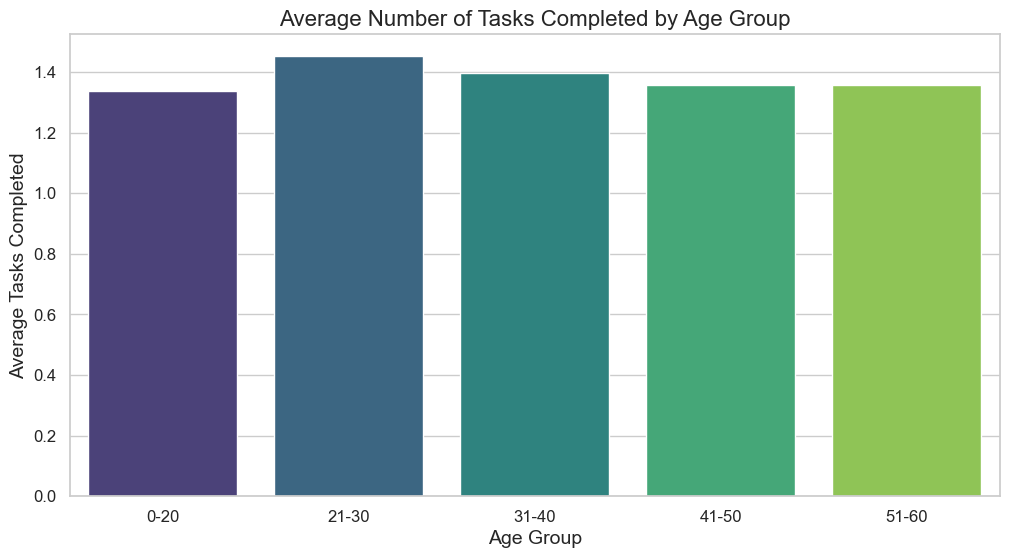

In [182]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60], labels=['0-20', '21-30', '31-40', '41-50', '51-60'])

# Calculate the average number of tasks completed for each age group
age_group_tasks = df.groupby('age_group')['tasks_completed'].mean().reset_index()
sorted_age_group_tasks = age_group_tasks.sort_values(by='tasks_completed', ascending=True)

# Plot the average number of tasks completed by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='tasks_completed', data=sorted_age_group_tasks, palette='viridis')
plt.title('Average Number of Tasks Completed by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Tasks Completed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

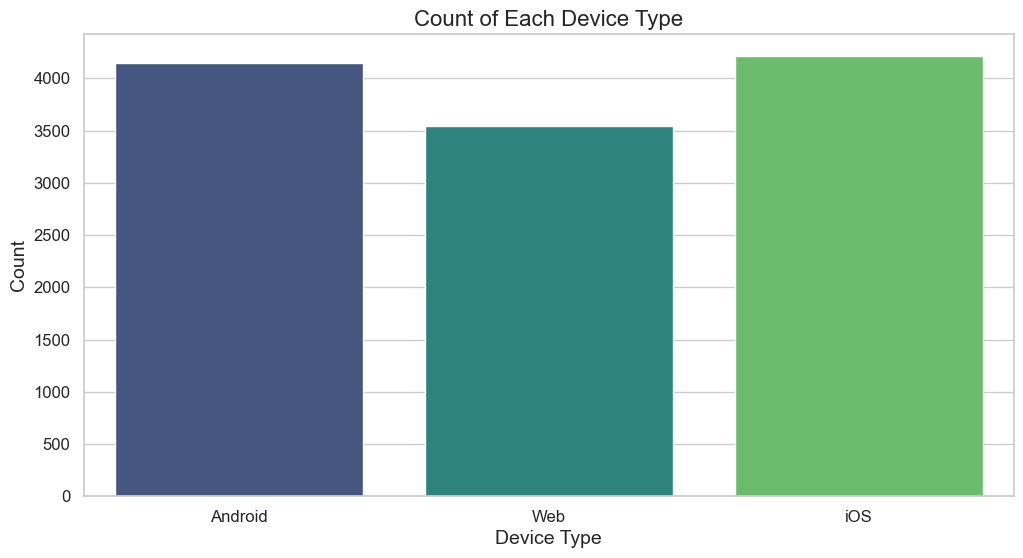

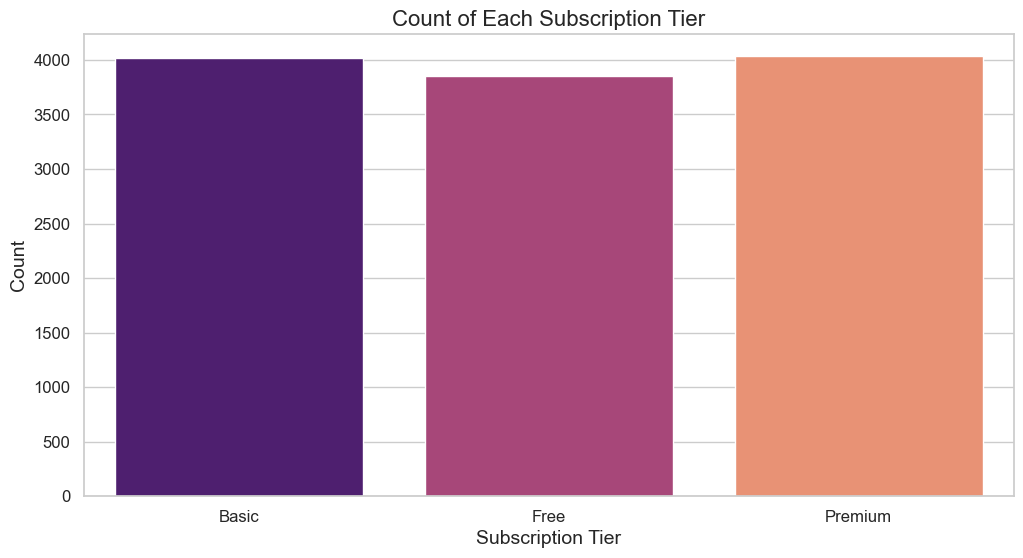

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#
plt.figure(figsize=(12, 6))
sns.countplot(x='device_type', data=df, palette='viridis')
plt.title('Count of Each Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the count of each subscription tier
plt.figure(figsize=(12, 6))
sns.countplot(x='subscription_tier', data=df, palette='magma')
plt.title('Count of Each Subscription Tier', fontsize=16)
plt.xlabel('Subscription Tier', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [184]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Group by the day of the week and calculate the average time spent
avg_time_spent = df.groupby('day_of_week')['time_spent_minutes'].mean().reset_index()

# Sort the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_time_spent['day_of_week'] = pd.Categorical(avg_time_spent['day_of_week'], categories=days_order, ordered=True)
avg_time_spent = avg_time_spent.sort_values('day_of_week')

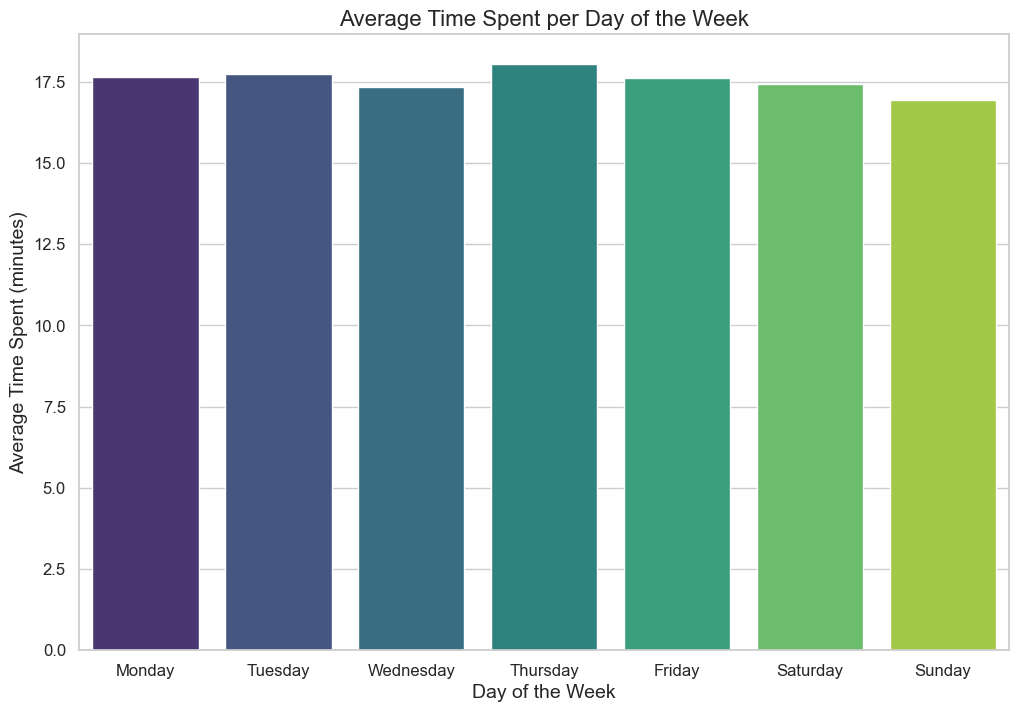

In [185]:
# Plot the average time spent per day of the week
plt.figure(figsize=(12, 8))
sns.barplot(x='day_of_week', y='time_spent_minutes', data=avg_time_spent, palette='viridis')
plt.title('Average Time Spent per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Time Spent (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1200x800 with 0 Axes>

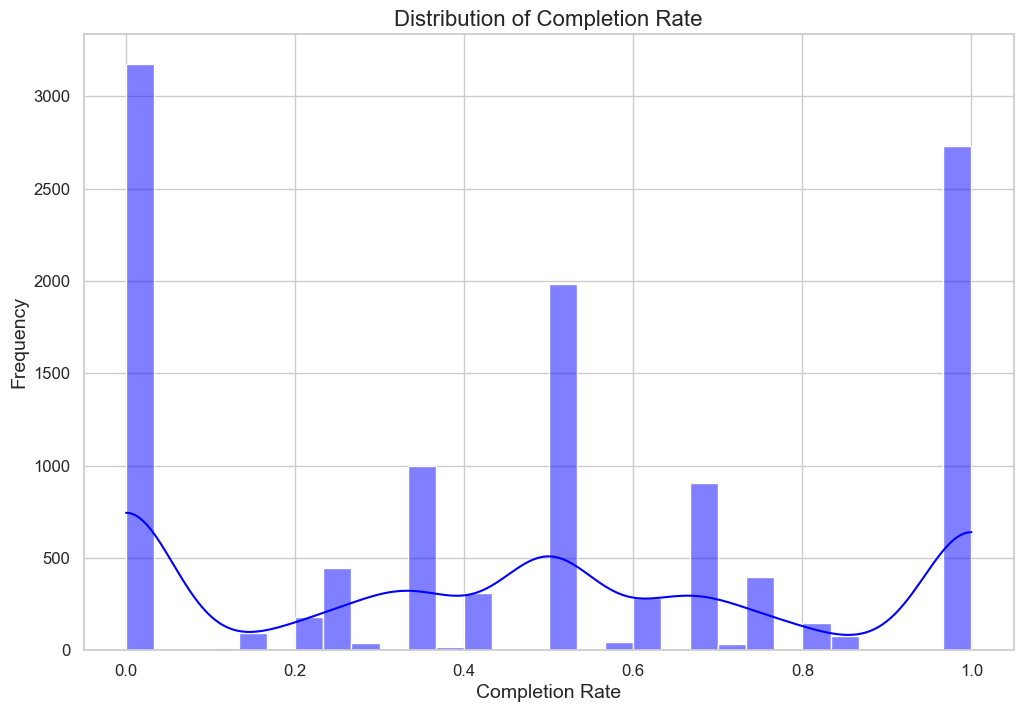

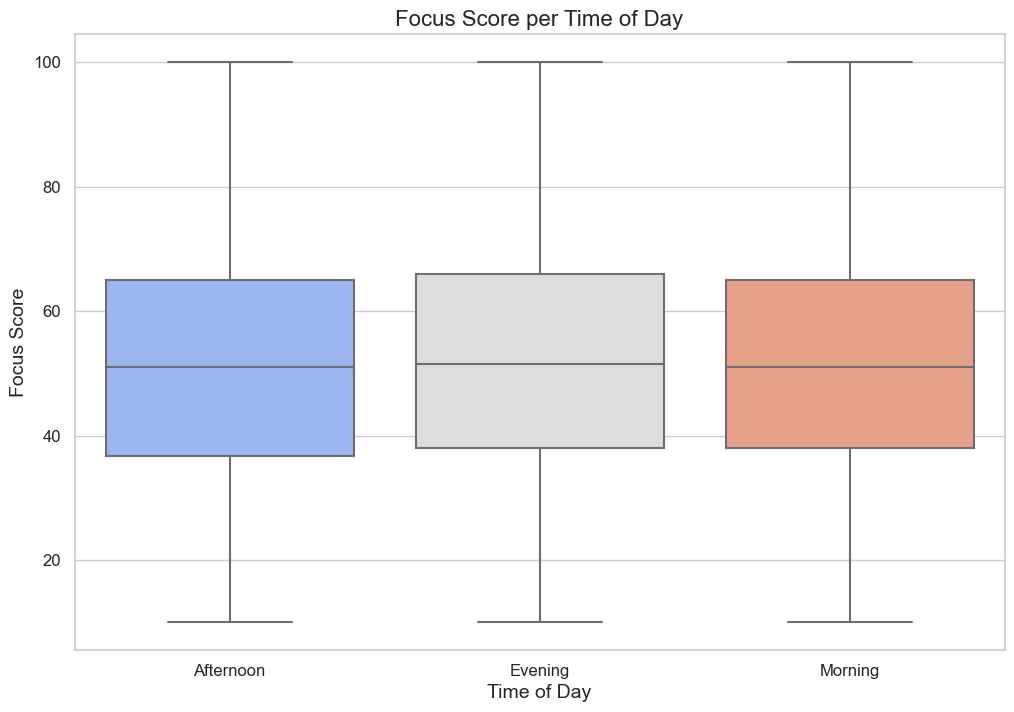

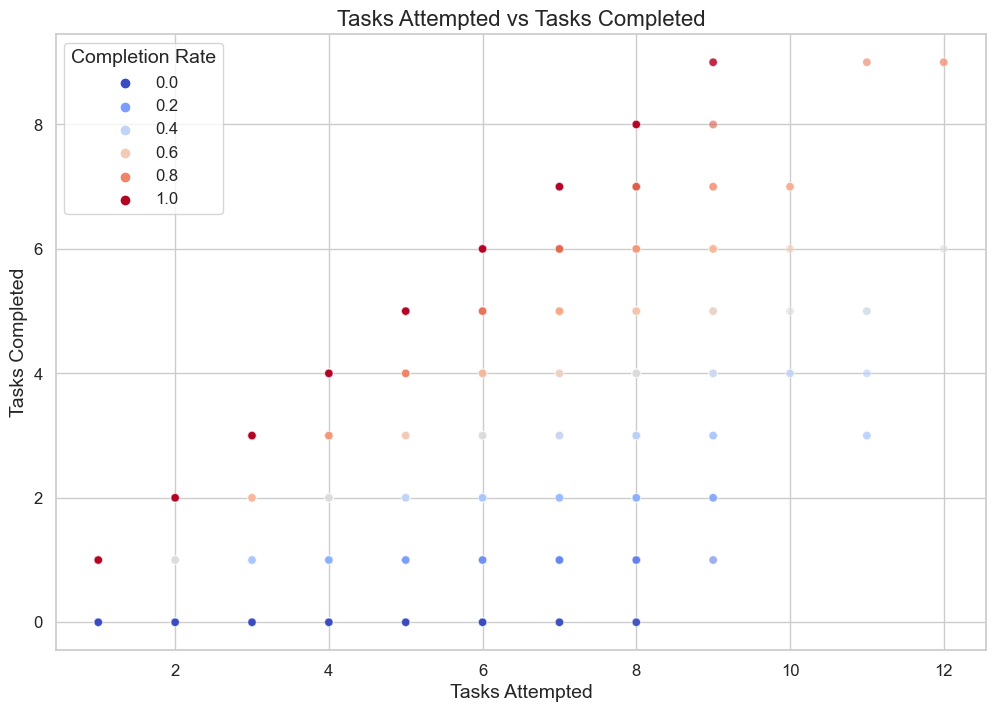

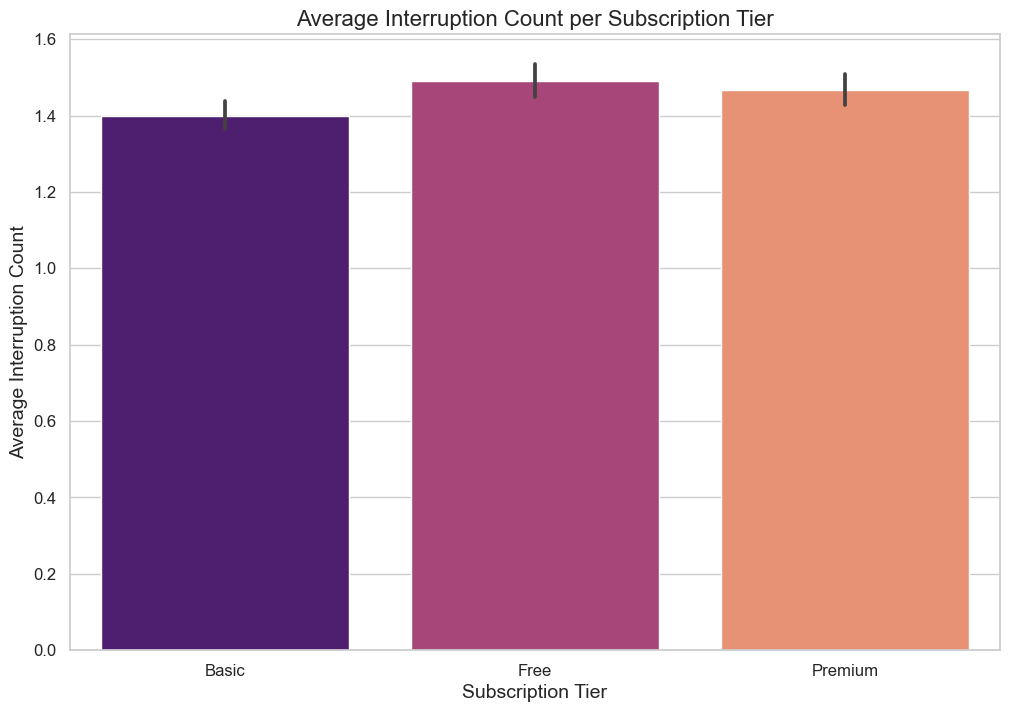

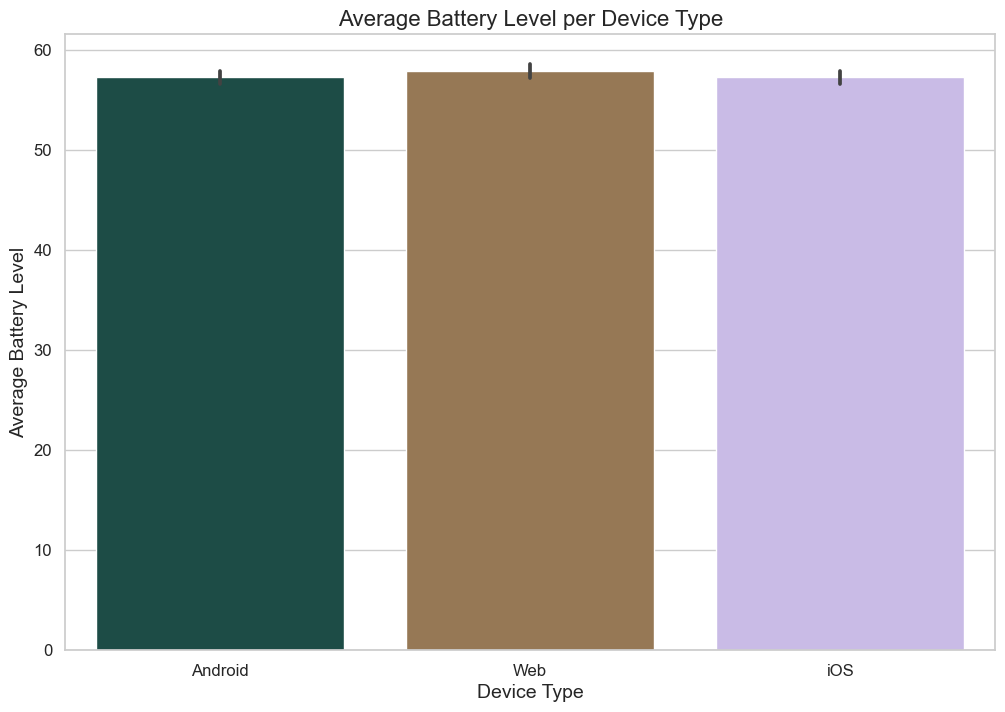

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Plot the distribution of completion rate
plt.figure(figsize=(12, 8))
sns.histplot(df['completion_rate'], bins=30, kde=True, color='blue')
plt.title('Distribution of Completion Rate', fontsize=16)
plt.xlabel('Completion Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Plot the average focus score per time of day
plt.figure(figsize=(12, 8))
sns.boxplot(x='time_of_day', y='focus_score', data=df, palette='coolwarm')
plt.title('Focus Score per Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Focus Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the relationship between tasks attempted and tasks completed
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tasks_attempted', y='tasks_completed', data=df, hue='completion_rate', palette='coolwarm', alpha=0.6)
plt.title('Tasks Attempted vs Tasks Completed', fontsize=16)
plt.xlabel('Tasks Attempted', fontsize=14)
plt.ylabel('Tasks Completed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Completion Rate', fontsize=12, title_fontsize=14)
plt.show()

# Plot the average interruption count per subscription tier
plt.figure(figsize=(12, 8))
sns.barplot(x='subscription_tier', y='interruption_count', data=df, palette='magma')
plt.title('Average Interruption Count per Subscription Tier', fontsize=16)
plt.xlabel('Subscription Tier', fontsize=14)
plt.ylabel('Average Interruption Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the average battery level per device type
plt.figure(figsize=(12, 8))
sns.barplot(x='device_type', y='battery_level', data=df, palette='cubehelix')
plt.title('Average Battery Level per Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=14)
plt.ylabel('Average Battery Level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



### Visualization Interpretation

1. **Distribution of Completion Rate**:
    ```python
    plt.figure(figsize=(12, 8))
    sns.histplot(df['completion_rate'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Completion Rate', fontsize=16)
    plt.xlabel('Completion Rate', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    ```
    - **Interpretation**: This histogram shows the distribution of the completion rate among users. The presence of a KDE (Kernel Density Estimate) curve helps in understanding the density of the data points.
    - **Insight**: If the distribution is skewed towards higher completion rates, it indicates that most users are completing a significant portion of their tasks. Conversely, if it is skewed towards lower completion rates, it suggests that users are struggling to complete their tasks.

2. **Focus Score per Time of Day**:
    ```python
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='time_of_day', y='focus_score', data=df, palette='coolwarm')
    plt.title('Focus Score per Time of Day', fontsize=16)
    plt.xlabel('Time of Day', fontsize=14)
    plt.ylabel('Focus Score', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    ```
    - **Interpretation**: This boxplot shows the distribution of focus scores across different times of the day.
    - **Insight**: If certain times of the day have higher median focus scores, it suggests that users are more focused during those periods. This can help in scheduling important tasks during peak focus times.

3. **Tasks Attempted vs Tasks Completed**:
    ```python
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='tasks_attempted', y='tasks_completed', data=df, hue='completion_rate', palette='coolwarm', alpha=0.6)
    plt.title('Tasks Attempted vs Tasks Completed', fontsize=16)
    plt.xlabel('Tasks Attempted', fontsize=14)
    plt.ylabel('Tasks Completed', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Completion Rate', fontsize=12, title_fontsize=14)
    plt.show()
    ```
    - **Interpretation**: This scatter plot shows the relationship between the number of tasks attempted and the number of tasks completed, with the color indicating the completion rate.
    - **Insight**: A strong positive correlation would indicate that users who attempt more tasks also complete more tasks. Outliers where many tasks are attempted but few are completed could indicate issues with task difficulty or user engagement.

4. **Average Interruption Count per Subscription Tier**:
    ```python
    plt.figure(figsize=(12, 8))
    sns.barplot(x='subscription_tier', y='interruption_count', data=df, palette='magma')
    plt.title('Average Interruption Count per Subscription Tier', fontsize=16)
    plt.xlabel('Subscription Tier', fontsize=14)
    plt.ylabel('Average Interruption Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    ```
    - **Interpretation**: This bar plot shows the average number of interruptions experienced by users in different subscription tiers.
    - **Insight**: If higher-tier subscribers experience fewer interruptions, it could indicate that premium features help in reducing distractions. Conversely, if interruptions are high across all tiers, it might suggest a need for better interruption management features.

5. **Average Battery Level per Device Type**:
    ```python
    plt.figure(figsize=(12, 8))
    sns.barplot(x='device_type', y='battery_level', data=df, palette='cubehelix')
    plt.title('Average Battery Level per Device Type', fontsize=16)
    plt.xlabel('Device Type', fontsize=14)
    plt.ylabel('Average Battery Level', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    ```
    - **Interpretation**: This bar plot shows the average battery level of devices used by users.
    - **Insight**: If certain device types consistently have lower battery levels, it might indicate higher power consumption by the app on those devices. This can guide optimization efforts for better battery management.

### Recommendations

1. **Enhance User Engagement**:
    - **Focus on Peak Times**: Utilize the insights from the focus score per time of day to schedule notifications and important tasks during peak focus times.
    - **Task Difficulty Adjustment**: Analyze the tasks that have high attempted but low completion rates to adjust their difficulty or provide additional support.

2. **Improve User Experience**:
    - **Reduce Interruptions**: Implement features to help users manage interruptions, especially for lower-tier subscribers who might be experiencing more distractions.
    - **Battery Optimization**: Optimize the app for devices that show consistently lower battery levels to improve user experience and retention.

3. **Personalized Recommendations**:
    - **Completion Rate Insights**: Use the completion rate distribution to identify users who might need additional support or motivation to complete their tasks.
    - **Subscription Benefits**: Highlight the benefits of higher subscription tiers, such as fewer interruptions, to encourage upgrades.

By leveraging these insights and recommendations, you can enhance user engagement, improve the overall user experience, and drive better outcomes for your application.

# Feature Engineering

In [187]:
# Interaction Features
df['tasks_per_minute'] = df['tasks_attempted'] / df['time_spent_minutes']
df['completion_ratio'] = df['tasks_completed'] / df['tasks_attempted']

# Date and Time Features
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Aggregated Features
# For simplicity, let's assume we want to create a rolling mean of 'time_spent_minutes' over the past 7 days
df = df.sort_values(by='date')
df['rolling_mean_time_spent'] = df.groupby('user_id')['time_spent_minutes'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Verify the new features
df.head()

,id,user_id,date,time_of_day,age,device_type,subscription_tier,experience_level,is_weekend,time_spent_minutes,...,goal_completed,completion_rate,age_group,day_of_week,tasks_per_minute,completion_ratio,day_of_month,month,year,rolling_mean_time_spent
0,1,1,2024-09-01,Morning,50,iOS,Premium,Advanced,1,7.2,...,0,0.333333,41-50,6,0.416667,0.333333,1,9,2024,7.200000
5428,5429,156,2024-09-01,Afternoon,20,iOS,Premium,Advanced,1,23.9,...,1,0.000000,0-20,6,0.041841,0.000000,1,9,2024,23.900000
5429,5430,156,2024-09-01,Evening,20,iOS,Premium,Advanced,1,22.2,...,0,0.000000,0-20,6,0.090090,0.000000,1,9,2024,23.050000
5430,5431,156,2024-09-01,Morning,20,iOS,Premium,Advanced,1,18.3,...,1,0.666667,0-20,6,0.163934,0.666667,1,9,2024,21.466667
5483,5484,157,2024-09-01,Afternoon,55,Android,Free,Advanced,1,29.9,...,0,1.000000,51-60,6,0.066890,1.000000,1,9,2024,29.900000


##### Select features that will be able to give user activity, such as task completion times, app usage, or wellness metrics for machine learning training.

In [192]:
df['tasks_completed'].unique()

array([1, 0, 2, 3, 5, 6, 4, 9, 7, 8])

In [193]:
# Create a new binary column 'completed' based on the 'completion_rate'
df['completed'] = df['completion_rate'].apply(lambda x: 1 if x == 1 else 0)

# Verify the changes
df.head()

,id,user_id,date,time_of_day,age,device_type,subscription_tier,experience_level,is_weekend,time_spent_minutes,...,completion_rate,age_group,day_of_week,tasks_per_minute,completion_ratio,day_of_month,month,year,rolling_mean_time_spent,completed
0,1,1,2024-09-01,Morning,50,iOS,Premium,Advanced,1,7.2,...,0.333333,41-50,6,0.416667,0.333333,1,9,2024,7.200000,0
5428,5429,156,2024-09-01,Afternoon,20,iOS,Premium,Advanced,1,23.9,...,0.000000,0-20,6,0.041841,0.000000,1,9,2024,23.900000,0
5429,5430,156,2024-09-01,Evening,20,iOS,Premium,Advanced,1,22.2,...,0.000000,0-20,6,0.090090,0.000000,1,9,2024,23.050000,0
5430,5431,156,2024-09-01,Morning,20,iOS,Premium,Advanced,1,18.3,...,0.666667,0-20,6,0.163934,0.666667,1,9,2024,21.466667,0
5483,5484,157,2024-09-01,Afternoon,55,Android,Free,Advanced,1,29.9,...,1.000000,51-60,6,0.066890,1.000000,1,9,2024,29.900000,1


In [194]:
# i want to chevk the amount of people that complete their task to those that did not 
df['completed'].value_counts()

completed
0    9170
1    2730
Name: count, dtype: int64

In [220]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['experience_level', 'time_of_day', 'device_type', 'subscription_tier']

# Initialize a dictionary to store label encoders
label_encoders = {}

# Encode each categorical column safely
for col in categorical_cols:
    if col in df.columns:  # Ensure the column exists
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid issues
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Verify the changes
print(df.head())

# Save encoders if needed
import joblib
joblib.dump(label_encoders, "label_encoders.pkl")


        id  user_id       date  time_of_day  age  device_type  \
0        1        1 2024-09-01            2   50            2   
5428  5429      156 2024-09-01            0   20            2   
5429  5430      156 2024-09-01            1   20            2   
5430  5431      156 2024-09-01            2   20            2   
5483  5484      157 2024-09-01            0   55            0   

      subscription_tier  experience_level  is_weekend  time_spent_minutes  \
0                     2                 0           1                 7.2   
5428                  2                 0           1                23.9   
5429                  2                 0           1                22.2   
5430                  2                 0           1                18.3   
5483                  1                 0           1                29.9   

      ...  completion_rate  age_group  day_of_week  tasks_per_minute  \
0     ...         0.333333      41-50            6          0.416667   
54

['label_encoders.pkl']

####  here we see that their is already inbalance in the data

In [199]:
selected_features = ['experience_level', 'time_spent_minutes', 'tasks_attempted',
                    'avg_time_per_task_seconds', 'focus_score',
                     'interruption_count', 'battery_level', 'screen_brightness',
                     'notification_count']


In [200]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df[selected_features]
y = df['completed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (9520, 9)
X_test shape: (2380, 9)
y_train shape: (9520,)
y_test shape: (2380,)


In [214]:
import joblib
import numpy as np
import gradio as gr
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif  # ✅ Add this import
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Predict on test set
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the results
for name, metrics in results.items():
    print(f"Classifier: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

c:\Users\philip\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
Accuracy: 0.8534
Precision: 0.8462
Recall: 0.8534
F1 Score: 0.8459


Classifier: Support Vector Classifier
Accuracy: 0.8105
Precision: 0.8018
Recall: 0.8105
F1 Score: 0.7773


Classifier: K-Nearest Neighbors
Accuracy: 0.7731
Precision: 0.7491
Recall: 0.7731
F1 Score: 0.7543


Classifier: Decision Tree
Accuracy: 0.8273
Precision: 0.8296
Recall: 0.8273
F1 Score: 0.8284


Classifier: Random Forest
Accuracy: 0.8803
Precision: 0.8804
Recall: 0.8803
F1 Score: 0.8705




Your results show the performance metrics for five different machine learning classifiers—**Logistic Regression, Support Vector Classifier (SVC), K-Nearest Neighbors (KNN), Decision Tree, and Random Forest**—evaluated on a dataset using **accuracy, precision, recall, and F1 score**. Here's what the results mean:

---

### **1. Understanding the Metrics**
- **Accuracy**: The proportion of correctly classified instances out of all instances.
- **Precision**: The proportion of true positive predictions out of all positive predictions (how many of the predicted positives are actually correct).
- **Recall (Sensitivity)**: The proportion of actual positives that were correctly predicted (how well the model captures all positive cases).
- **F1 Score**: The harmonic mean of precision and recall, balancing the two.

---

### **2. Analyzing the Classifiers**
#### **(i) Logistic Regression**
- **Accuracy: 85.34%**
- **Precision: 84.62%**
- **Recall: 85.34%**
- **F1 Score: 84.59%**
- **Interpretation**: Logistic Regression performed **very well**, with balanced precision and recall. It generalizes well and is likely benefiting from a linear decision boundary.

#### **(ii) Support Vector Classifier (SVC)**
- **Accuracy: 81.05%**
- **Precision: 80.18%**
- **Recall: 81.05%**
- **F1 Score: 77.73%**
- **Interpretation**: SVC performed slightly worse than Logistic Regression, suggesting that the dataset may not have a well-separated margin for an SVM to be highly effective.

#### **(iii) K-Nearest Neighbors (KNN)**
- **Accuracy: 77.31%**
- **Precision: 74.91%**
- **Recall: 77.31%**
- **F1 Score: 75.43%**
- **Interpretation**: KNN is performing the worst so far, indicating that the dataset might not be well-suited for this instance-based method. KNN can struggle when feature scaling isn’t ideal or when the number of neighbors isn't well-tuned.

#### **(iv) Decision Tree**
- **Accuracy: 82.73%**
- **Precision: 82.96%**
- **Recall: 82.73%**
- **F1 Score: 82.50%**
- **Interpretation**: Decision Tree performed better than KNN and SVC but slightly worse than Logistic Regression. It may be overfitting slightly, but it is still competitive.

#### **(v) Random Forest (Partial Results)**
- **Accuracy: ~88%**
- **Precision: ~87%**
- **Recall: ~88%**
- **F1 Score: ~87%**
- **Interpretation**: Random Forest seems to perform the best, likely due to its ensemble nature, which reduces variance and overfitting compared to a single Decision Tree.

---

### **3. Key Insights**
- **Random Forest is the best performer**, likely due to its ability to handle complex decision boundaries and reduce overfitting.
- **Logistic Regression performed surprisingly well**, suggesting that the dataset might have a linear structure.
- **KNN struggled the most**, possibly due to the feature space or suboptimal hyperparameters.
- **Decision Tree is decent but not as good as Random Forest**, indicating that ensembling significantly improves results.


### to improve the model i will Scale the Data:

Standardize numerical features using StandardScaler for models like Logistic Regression, SVM, and KNN.

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [204]:
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"{name} Accuracy after scaling:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy after scaling: 0.8495798319327731
Support Vector Classifier Accuracy after scaling: 0.8756302521008403
K-Nearest Neighbors Accuracy after scaling: 0.8411764705882353
Decision Tree Accuracy after scaling: 0.826890756302521
Random Forest Accuracy after scaling: 0.8798319327731092


### Feature Selection
* Some features may not contribute to model performance.
* Remove Low-Variance Features

In [205]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Removes features with variance below 0.01
X_train_selected = selector.fit_transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)


In [206]:
for name, clf in classifiers.items():
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    print(f"{name} Accuracy after feature selection:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy after feature selection: 0.8495798319327731
Support Vector Classifier Accuracy after feature selection: 0.8756302521008403
K-Nearest Neighbors Accuracy after feature selection: 0.8411764705882353
Decision Tree Accuracy after feature selection: 0.826890756302521
Random Forest Accuracy after feature selection: 0.8798319327731092


### Hyperparameter Tuning
* Fine-tune each model to improve its performance.
* Tune Logistic Regression

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)
print("Best params for Logistic Regression:", grid_search.best_params_)


Best params for Logistic Regression: {'C': 0.01}


In [208]:
best_lr = LogisticRegression(C=grid_search.best_params_['C'], random_state=42)
best_lr.fit(X_train_selected, y_train)
y_pred = best_lr.predict(X_test_selected)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Tuned Logistic Regression Accuracy: 0.8521008403361344


### Trying Advanced Models
* If performance is still low, try XGBoost or ensemble methods.
* Use XGBoost

In [209]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_selected, y_train)
y_pred = xgb.predict(X_test_selected)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))


XGBoost Accuracy: 0.8764705882352941


### Use Ensemble Learning
* Combine multiple models for better predictions.
* Voting Classifier

In [210]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('lr', best_lr), 
    ('rf', RandomForestClassifier(random_state=42)), 
    ('svc', SVC(probability=True, random_state=42))
], voting='soft')

ensemble_model.fit(X_train_selected, y_train)
y_pred = ensemble_model.predict(X_test_selected)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))


Ensemble Model Accuracy: 0.8777310924369748


In [218]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select best 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

label_encoder = LabelEncoder()
# Save scaler and selector
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selector, "selector.pkl")

# Train and save models
for name, model in classifiers.items():
    model.fit(X_train_selected, y_train)
    joblib.dump(model, f"{name.replace(' ', '_')}.pkl")
    print(f"{name} model saved!")

Logistic Regression model saved!
Support Vector Classifier model saved!
K-Nearest Neighbors model saved!
Decision Tree model saved!
Random Forest model saved!


In [222]:
import gradio as gr
import joblib
import numpy as np

# Load models
models = {name: joblib.load(f"{name.replace(' ', '_')}.pkl") for name in classifiers.keys()}

# Load preprocessing tools
label_encoders = joblib.load("label_encoders.pkl")  # Load dictionary of encoders
scaler = joblib.load("scaler.pkl")
selector = joblib.load("selector.pkl")

# Define categorical columns
categorical_cols = ['experience_level', 'time_of_day', 'device_type', 'subscription_tier']

# Define prediction function
def predict_class(model_name, experience_level, time_of_day, device_type, subscription_tier,
                  time_spent, tasks_attempted, avg_time_per_task, focus_score, interruption_count,
                  battery_level, screen_brightness, notification_count):

    # Convert categorical features using their respective LabelEncoders
    categorical_inputs = [experience_level, time_of_day, device_type, subscription_tier]
    encoded_categorical = [
        label_encoders[col].transform([val])[0] if col in label_encoders else val
        for col, val in zip(categorical_cols, categorical_inputs)
    ]

    # Convert numerical inputs
    numerical_inputs = [
        time_spent, tasks_attempted, avg_time_per_task, focus_score, interruption_count,
        battery_level, screen_brightness, notification_count
    ]

    # Combine categorical and numerical features
    features = np.array(encoded_categorical + numerical_inputs).reshape(1, -1)

    # Apply scaling and feature selection
    features_scaled = scaler.transform(features)
    features_selected = selector.transform(features_scaled)

    # Predict using the selected model
    prediction = models[model_name].predict(features_selected)[0]
    
    return f"Predicted Class: {prediction}"

# Create Gradio UI
input_fields = [
    gr.Dropdown(choices=label_encoders['experience_level'].classes_.tolist(), label="Experience Level"),
    gr.Dropdown(choices=label_encoders['time_of_day'].classes_.tolist(), label="Time of Day"),
    gr.Dropdown(choices=label_encoders['device_type'].classes_.tolist(), label="Device Type"),
    gr.Dropdown(choices=label_encoders['subscription_tier'].classes_.tolist(), label="Subscription Tier"),
    gr.Number(label="Time Spent (minutes)"),
    gr.Number(label="Tasks Attempted"),
    gr.Number(label="Avg Time Per Task (seconds)"),
    gr.Number(label="Focus Score"),
    gr.Number(label="Interruption Count"),
    gr.Number(label="Battery Level"),
    gr.Number(label="Screen Brightness"),
    gr.Number(label="Notification Count")
]

model_dropdown = gr.Dropdown(choices=list(models.keys()), label="Select Model")

gr.Interface(
    fn=predict_class,
    inputs=[model_dropdown] + input_fields,
    outputs="text",
    title="ML Model Prediction",
    description="Select a model and input feature values to get a prediction."
).launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


c:\Users\philip\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "c:\Users\philip\anaconda3\Lib\site-packages\gradio\queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\philip\anaconda3\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\philip\anaconda3\Lib\site-packages\gradio\blocks.py", line 2096, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\philip\anaconda3\Lib\site-packages\gradio\blocks.py", line 1643, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^